# Milestone 2: About Running Jupyter notebooks
Each code cell is selectable and is preceded by a tag in the left margin. The tag format is In [x]:.
Depending on the state of the notebook, the x can be:
- A blank, this indicates that the cell has never been executed.
- A number, this number represents the relative order this code step was executed.
- A *, this indicates that the cell is currently executing.

In [1]:
#Example running jupyter notebook
print("Testing!")

Testing!


# Milestone 3: Importing libraries and Understanding the Raw data
You are about to copy paste the following commands in the notebook cells. Ensure to wait until the star to the left of the cell has turned into a number, then move to the next cell using the + sign (just under
the edit menu item)

In [3]:
!pip install scikit-learn
!pip install --upgrade pixiedust

     |████████████████████████████████| 197 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 24.9 MB/s eta 0:00:01
  Created wheel for pixiedust: filename=pixiedust-1.1.18-py3-none-any.whl size=321728 sha256=3090d8c3e57f472a09fa4b7cb0aec88766a6db1695f2e2b857b946319b4dfb29
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/41/4c/20/08a843440aaeffc976c1848c9eb44be6ec68dcd964421ec6f7
  Created wheel for mpld3: filename=mpld3-0.5.1-py3-none-any.whl size=364062 sha256=fb4ec78b549c569ab8811495475e3fb3adb4c902dbd88ae1faa3e0f80a9d7142
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b9/36/27/d61b9f1327012961fa31f05a20b190f836dd3fcb1c0264177b
Successfully built pixiedust mpld3


In [6]:
!pip install brunel

     |████████████████████████████████| 2.2 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 37.8 MB/s eta 0:00:01
  Created wheel for brunel: filename=brunel-2.6.2-py3-none-any.whl size=2161246 sha256=ed9ae08902bc528f27c242e010251ffb526bc76f233cec98e860bea33d6eded3
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/5b/76/52/7910d0d24e582cc63e46b024289b84cdedf5e1919879ca136e
Successfully built brunel


In [8]:
!pip install watson_machine_learning_client

     |████████████████████████████████| 538 kB 14.0 MB/s eta 0:00:01


In [22]:
import joblib
import pixiedust
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import brunel
import joblib

In [24]:
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'


In [26]:
display(raw_df)

HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,PRIMARY_DRIVER_ID,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,PLATE,COLOR,INITIAL_ODOMETER,LOW_MILEAGE_USE,FIRST_NAME,LAST_NAME,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT,WORK_ADDR_NUMB,WORK_ADDR_STREET_NAME,WORK_ADDR_UNIT_DESIGNATION,WORK_ADDR_UNIT_NUMBER,WORK_ADDR_CITY,WORK_ADDR_STATE,WORK_ADDR_ZIPCODE,WORK_ADDR_LATITUDE,WORK_ADDR_LONGITUDE,WORK_ADDR_PBKEY,ADDR_STREET_NUMBER,ADDR_STREET_NAME,ADDR_UNIT_DESIGNATION,ADDR_UNIT_NUMBER,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
LF35202,FTE9359,SY2891953,A-2016-DI581,1,nan,3,91330.9,2016-06-09 00:00:00.0,2016-06-09 00:00:00.0,1,1,41.94579927,-87.76423351,1460.0,0,FTE9359,2015-10-13,2016-10-12,2012,Ford,F-150,HFEB775,White,82032.0,0,Stefan,Purcel,M,1968-10-08,215-92-0509,J451-8942-1842,2018-07-24,IL,2006-10-06,836-932-0542,spurcel@fasstmail.com,0,6336,S WESTERN AVE,nan,nan,CHICAGO,IL,60636,41.778096999999995,-87.683998,P00007UWQ996,1208,NOYES ST,nan,nan,EVANSTON,IL,60201,42.058139000000004,-87.688342,-87.688342
BJ29463,ADI9199,PO6164104,A-2017-XH615,5,nan,3,238591.1,2017-09-17 00:00:00.0,2017-09-30 00:00:00.0,1,1,41.75829349,-87.62468287,1860.0,0,ADI9199,2016-03-23,2017-03-23,2006,Dodge,Ram,OQLD259,Silver,223848.0,0,August,Morgenthal,M,1955-06-14,646-55-3888,P408-2484-1302,2021-02-26,IL,2004-09-10,840-953-0759,amorgenthal@yahoot.com,0,4850,W OGDEN AVE,nan,nan,CICERO,IL,60804,41.843641,-87.74667099999999,P00007UWS0DC,1836,VENSON LN,nan,nan,JOLIET,IL,60435,41.545479,-88.12751,-88.12751
CG84971,XRQ9231,TS4391466,A-2017-ED558,1,nan,3,289732.8,2017-03-24 00:00:00.0,2017-03-24 00:00:00.0,0,1,41.90153409,-87.75561055,1400.0,0,IZH2631,2016-03-08,2017-03-08,2003,Ford,F-150,AJII984,Med Red,286188.0,0,Millard,Whitty,M,1999-06-20,728-75-4998,I374-4420-8242,2021-10-27,IL,2008-05-07,359-334-0066,mwhitty@beemail.com,0,3109,W BELLE PLAINE AVE,APT,3,CHICAGO,IL,60618,41.955596,-87.70595,P00007UUHELA,1412,DURNESS CT,nan,nan,NAPERVILLE,IL,60565,41.741982,-88.161507,-88.161507
BA79937,BLV8655,TU0769843,A-2016-MT971,1,nan,1,192320.1,2016-08-22 00:00:00.0,2016-09-03 00:00:00.0,1,1,41.778639500000004,-87.72261309,39307.0,1,BLV8655,2015-08-21,2016-08-20,2006,Chevrolet,Tahoe,SZSY004,Med Red,187680.0,0,Donald,Sprosty,M,1955-09-21,006-98-8737,J721-8375-9029,2019-12-24,IL,2014-01-14,738-442-0942,dsprosty@yahoot.com,1,3947,W ROOSEVELT RD,nan,nan,CHICAGO,IL,60624,41.865897,-87.724513,P00007UWPGMD,5021,S JUSTINE ST,nan,nan,CHICAGO,IL,60609,41.8025,-87.663237,-87.663237
ME61905,COD5340,PO3687159,A-2018-QD453,5,nan,3,183229.7,2018-05-08 00:00:00.0,2018-05-16 00:00:00.0,1,1,41.76915305,-87.66378819,2800.0,0,COD5340,2017-06-05,2018-06-05,2009,Chrysler,Pacifica,MPDI365,Silver,182640.0,0,Seth,Ferrero,M,1965-04-09,540-39-4820,Q945-8966-7475,2018-12-13,IL,2002-11-23,245-972-0089,sferrero@life.com,0,6246,W GRAND AVE,nan,nan,CHICAGO,IL,60639,41.922074,-87.78228399999999,P00007UUQQ0E,4541,CRACOW AVE,nan,nan,LYONS,IL,60534,41.807854999999996,-87.836313,-87.836313
MI08265,OQM4592,RR4766997,A-2016-XT274,3,nan,1,144226.8,2016-09-16 00:00:00.0,2016-09-18 00:00:00.0,1,1,41.99753989,-87.70700596,30400.0,1,OQM4592,2015-01-20,2016-01-20,2010,Hyundai,Tucson,ZWNI622,Black,138816.0,0,Gerald,Nicoulin,M,1940-09-16,720-30-7189,Z917-5786-2149,2018-10-08,IL,2004-10-06,749-204-0396,gnicoulin@outloop.com,0,6609,S MORGAN ST,nan,nan,CHICAGO,IL,60621,41.773803,-87.649148,P00007UWP2II,3213,ENTERPRISE PARK AVE,nan,nan,SOUTH CHICAGO HEIGHTS,IL,60411,41.479676,-87.642267,-87.642267
FH81231,RQZ1566,ZR4462879,A-2018-VT470,1,nan,3,391866.9,2018-02-22 00:00:00.0,2018-02-26 00:00:00.0,0,1,41.73416431,-87.55121062,2400.0,0,FSC3949,2017-01-10,2018-01-10,1998,Dodge,Durango,WGOW284,Med Dark Green,385536.0,0,Charley,Royland,M,


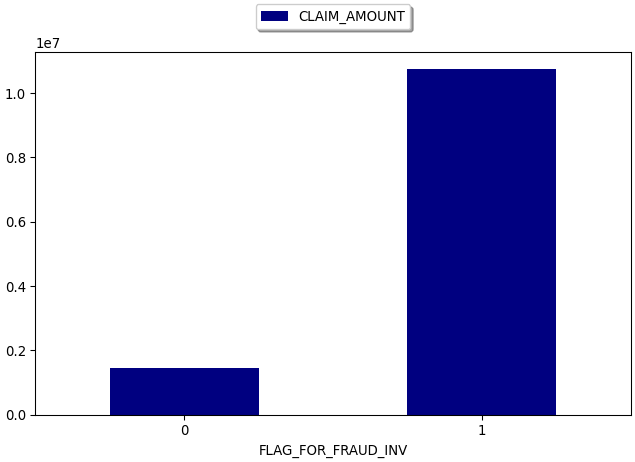

In [25]:
display(raw_df)


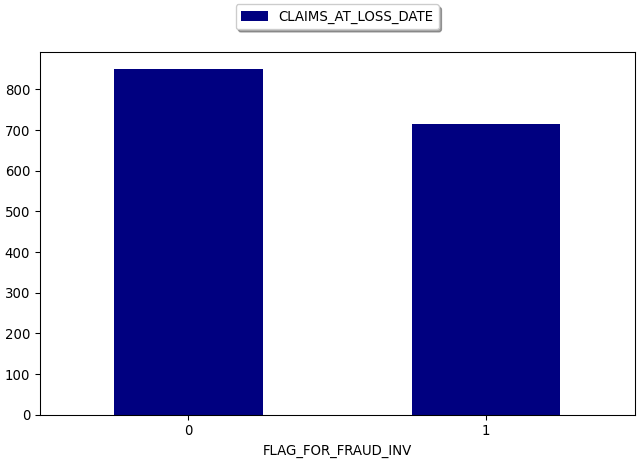

In [27]:
display(raw_df)


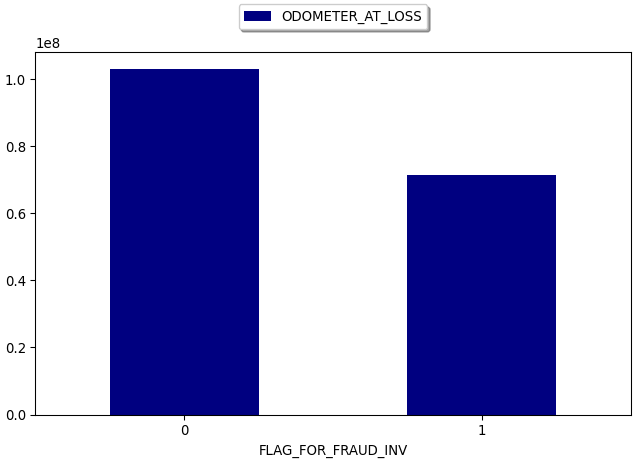

In [28]:
display(raw_df)


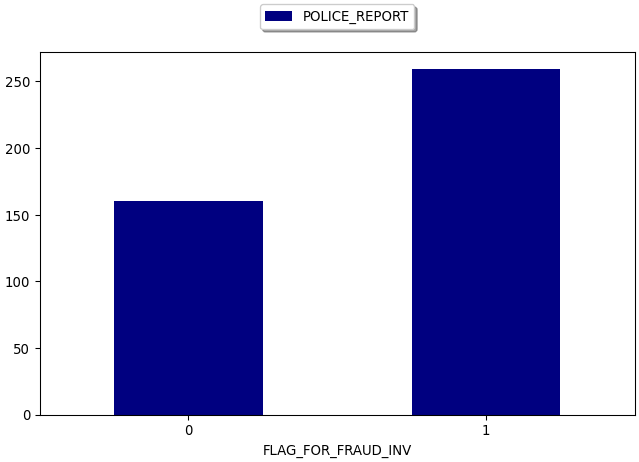

In [29]:
display(raw_df)

In [30]:
display(raw_df)

Notice that the closer the incident was to downtown, the greater the police reports. Perhaps you can think of ways to close the gap between plenty of accidents, yet sparse police reports in rural areas.<br>
**What other variables would you peg against the locations of incidents?**

In [31]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["EXPIRY_DATE"] = pd.to_datetime(raw_df["EXPIRY_DATE"])
raw_df["LOSS_EVENT_TIME"] = pd.to_datetime(raw_df["LOSS_EVENT_TIME"])
raw_df["DAYS_FROM_LOSS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["EXPIRY_DATE"]
raw_df["DAYS_FROM_LOSS"] = abs(raw_df.DAYS_FROM_LOSS.dt.days)
raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1
raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0

In [32]:
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [33]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df["DRIVERS_LICENSE_EXPIRY"] - raw_df["LOSS_EVENT_TIME"]
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df.DAYS_FROM_L_EXPIRY.dt.days
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1

In [34]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)
raw_df["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])
raw_df["DAYS_AT_ADDRESS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["DATE_AT_CURRENT_ADDRESS"]
raw_df["DAYS_AT_ADDRESS"] = abs(raw_df.DAYS_AT_ADDRESS.dt.days)
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0

In [35]:
raw_df["SUSPICIOUS_LIVING"].value_counts()

1.0    973
0.0      2
Name: SUSPICIOUS_LIVING, dtype: int64

In [36]:
#7500/year
raw_df["START_DATE"] = pd.to_datetime(raw_df["START_DATE"])
#find number of days between policy creation and accident
raw_df["LENGTH_OF_POLICY"]=(raw_df["LOSS_EVENT_TIME"] - raw_df["START_DATE"]).dt.days
#convert to years
raw_df["LENGTH_OF_POLICY"]=raw_df["LENGTH_OF_POLICY"]/365
#divide Odometer at loss by years
raw_df["MILES/YEAR"] = raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_OF_POLICY"]
raw_df["MILES/YEAR"].value_counts()

145432.118234    1
234953.253233    1
55515.574648     1
123525.401515    1
198472.566993    1
                ..
98941.082789     1
100299.475188    1
61050.847328     1
54548.889011     1
170432.357027    1
Name: MILES/YEAR, Length: 975, dtype: int64

In [38]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss
raw_df.loc[raw_df["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1
raw_df.loc[raw_df["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0

In [39]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]==raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0
raw_df.loc[raw_df["LOW_MILEAGE_USE"]!=raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1

In [40]:
raw_df.loc[raw_df["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0
raw_df.loc[raw_df["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1

In [41]:
# dataframes for certain features
features = ['FLAG_FOR_FRAUD_INV',
'SUSPICIOUS_MILEAGE',
'EXPIRED_LICENSE',
'SUSPICIOUS_CLAIM_TIME',
'SUSPICIOUS_LIVING',
'EXCESSIVE_CLAIM_AMOUNT']

In [42]:
df_model = raw_df[features]

In [44]:
#ensure all relevant features are integers
df_model["SUSPICIOUS_LIVING"] = df_model["SUSPICIOUS_LIVING"].astype(int)
df_model["EXPIRED_LICENSE"] = df_model["EXPIRED_LICENSE"].astype(int)
df_model["SUSPICIOUS_CLAIM_TIME"] = df_model["SUSPICIOUS_CLAIM_TIME"].astype(int)
df_model["SUSPICIOUS_MILEAGE"] = df_model["SUSPICIOUS_MILEAGE"].astype(int)
df_model["EXCESSIVE_CLAIM_AMOUNT"] = df_model["EXCESSIVE_CLAIM_AMOUNT"].astype(int)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [45]:
raw_df.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,...,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,...,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.0,0.094903,0.086116
1,1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,...,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.0,0.088670,0.933498


In [48]:
#split data into x and y variables
xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]
yVar = df_model["FLAG_FOR_FRAUD_INV"]

In [49]:
xVar.head()

,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [50]:
#split into a test/train set
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [51]:
#train model with Random Forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [52]:
#create confusion matrix to gut check model
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,111,7
1,4,73


**Hasil jika dikalkulasikan:**

In [79]:
TP = 73
FP = 7
FN = 4
precision= 73/(73+7)
recall=73/(73+4)
f1=2*(precision*recall/(precision+recall))
print("Precision= ", round(precision,2))
print("Recall= ", round(recall,2))
print("f1-score= ", round(f1,2))

Precision=  0.91
Recall=  0.95
f1-score=  0.93


### Tambahan diluar Modul: Menggunakan function classification_report untuk mengetahui akurasi, precision, recall, f1-score, dll

In [86]:
y_predict= clf.predict(X_test)

In [87]:
y_predict[:20] #Hanya menampilkan hingga array 20

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       118
           1       0.91      0.95      0.93        77

    accuracy                           0.94       195
   macro avg       0.94      0.94      0.94       195
weighted avg       0.94      0.94      0.94       195



#### Dapat dilihat nilai precision, recall, dan f1-score sama dengan menggunakan function classification report, yaitu:
- Precision=  0.91
- Recall=  0.95
- f1-score=  0.93